In [0]:
import pandas as pd
import numpy as np

In [0]:
# pip install --upgrade pandas

In [3]:
pd.__version__ 

'1.0.1'

#### Reading In Data With read_csv()

In [0]:
# https://andybek.com/pandas-drinks

In [5]:
pd.read_csv('https://andybek.com/pandas-drinks')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [6]:
pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'])

,country,wine_servings
0,Afghanistan,NaN
1,Albania,54.0
2,Algeria,14.0
3,Andorra,312.0
4,Angola,45.0
...,...,...
188,Venezuela,3.0
189,Vietnam,1.0
190,Yemen,NaN
191,Zambia,4.0


In [0]:
alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'], index_col='country', squeeze=True)

In [8]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [9]:
type(alcohol)

pandas.core.series.Series

#### Series Sizing With .size, .shape, And len()

In [10]:
alcohol.size

193

In [11]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [12]:
alcohol.values

array([ nan,  54.,  14., 312.,  45.,  45., 221.,  11., 212., 191.,   5.,
        51.,   7.,  nan,  36.,  42., 212.,   8.,  13.,  nan,   8.,   8.,
        35.,  16.,   1.,  94.,   7.,  nan,   7.,  16.,   1.,   4.,   1.,
         1.,   1., 172.,   8.,   3.,   1.,   9.,  74.,  11., 254.,   5.,
       113., 134.,  nan,   1., 278.,   3.,  26.,   9.,   3.,   1.,   2.,
       233.,  nan,  59.,  nan,   1.,  97.,  37.,  59.,   1., 149., 175.,
         1., 218.,  28.,   2.,   2.,  21.,   1.,   1.,   2., 185.,  78.,
        nan,  nan,  nan,  nan, 165.,   9., 237.,   9.,  16.,   1.,  12.,
         2.,   1.,  nan,   6., 123.,  62.,  31.,  nan,   2.,  nan,  56.,
       271.,   4.,   1.,  nan,  nan,   1.,  12.,  nan,  nan,  18.,   5.,
        18.,  nan,   8., 128.,   1.,   5.,  nan,   1.,   8.,  nan,  19.,
       175.,   1.,   1.,   2.,   7., 129.,   1.,  nan,  23.,  18.,   1.,
        74.,  21.,   1.,  56., 339.,   7.,   9.,  18., 167.,  73.,  nan,
        32.,  71.,  11.,  24.,  nan,  14.,  nan,   

In [13]:
alcohol.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [14]:
alcohol.values.size == alcohol.index.size

True

In [15]:
alcohol.shape

(193,)

In [16]:
alcohol.size == alcohol.shape[0]

True

In [17]:
len(alcohol)

193

#### Unique Values And Series Monotonicity

In [18]:
alcohol.is_unique

False

In [19]:
alcohol.head().is_unique

True

In [20]:
alcohol.nunique(dropna=False)

72

In [0]:
# monotonicity

In [22]:
pd.Series([1,2,3]).is_monotonic

True

In [23]:
pd.Series([1,2,3,3,3,3]).is_monotonic

True

In [24]:
pd.Series([1,2,3,3,3,3,4,10,79,100]).is_monotonic

True

In [25]:
pd.Series(reversed([1,2,3,3,3,3,4,10,79,100])).is_monotonic_decreasing

True

#### The count() Method

In [26]:
alcohol.count()

162

In [27]:
alcohol.size

193

In [28]:
alcohol.hasnans

True

#### Accessing And Counting NA's

In [29]:
alcohol.size

193

In [30]:
alcohol.count()

162

In [31]:
alcohol.isnull()

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [32]:
alcohol[alcohol.isnull()].index

Index(['Afghanistan', 'Bangladesh', 'Bhutan', 'Burundi', 'North Korea',
       'Eritrea', 'Ethiopia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kuwait',
       'Lesotho', 'Libya', 'Malaysia', 'Maldives', 'Marshall Islands',
       'Mauritania', 'Monaco', 'Myanmar', 'Nepal', 'Pakistan', 'Rwanda',
       'San Marino', 'Saudi Arabia', 'Somalia', 'Sri Lanka', 'Sudan',
       'Tajikistan', 'Uganda', 'Yemen'],
      dtype='object', name='country')

In [33]:
type(alcohol[alcohol.isnull()].index)

pandas.core.indexes.base.Index

In [34]:
list(alcohol[alcohol.isnull()].index)

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'Burundi',
 'North Korea',
 'Eritrea',
 'Ethiopia',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Kuwait',
 'Lesotho',
 'Libya',
 'Malaysia',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Rwanda',
 'San Marino',
 'Saudi Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Uganda',
 'Yemen']

In [35]:
len(list(alcohol[alcohol.isnull()].index))

31

In [0]:
# cumbersome: very difficult to work with

In [0]:
# antonym: pandorable -> adorable and involving pandas

In [38]:
alcohol.isnull().sum()

31

In [0]:
# booleans are integers in python

In [40]:
sum([True, False, True])

2

In [0]:
all = alcohol.size

In [0]:
nonnulls = alcohol.count()

In [0]:
nulls = alcohol.isna().sum()

In [44]:
all == nonnulls + nulls

True

#### BONUS: Another Approach

In [0]:
# ufunc -> universal function

In [46]:
np.isnan

<ufunc 'isnan'>

In [0]:
ser = pd.Series(data=[True, False, None, 2], dtype=float)

In [48]:
np.isnan(ser)

0    False
1    False
2     True
3    False
dtype: bool

In [49]:
ser

0    1.0
1    0.0
2    NaN
3    2.0
dtype: float64

In [50]:
alcohol[np.isnan].size

31

In [0]:
# alcohol[alcohol.isna()]

#### The Other Side: notnull() And notna()

In [0]:
# notnull()

In [53]:
alcohol.notnull()

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

In [54]:
alcohol.loc[alcohol.notna()]

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [55]:
alcohol.notna().sum()

162

In [56]:
alcohol.count()

162

In [57]:
alcohol.notnull().sum() + alcohol.isnull().sum() == alcohol.size

True

In [58]:
type(True)

bool

#### BONUS: Booleans Are Literally Numbers In Python

In [59]:
True + 19

20

In [60]:
True + True - False + True * 3

5

In [0]:
# 5 / False

In [62]:
type(True)

bool

In [63]:
type(False)

bool

In [64]:
bool.__mro__

(bool, int, object)

In [65]:
alcohol.isnull().sum()

31

#### Skill Challenge

###### **1**.

Isolate the non-nulls in the *alcohol* series and assign them to the variable *wine_servings*.

###### **2**.

What is the total wine consumed by countries in *wine_servings*?

###### **BONUS 3**.

In the *wine_servings* dataset, what was the total wine consumed by countries that consumed less than 100 servings?

*Hint*: apply a boolean mask to identify such countries, then sum().

#### Solution

In [0]:
# 1

In [0]:
wine_servings = alcohol[alcohol.notnull()]

In [68]:
wine_servings.head()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Name: wine_servings, dtype: float64

In [0]:
# 2

In [70]:
wine_servings.sum()

8221.0

In [0]:
# 3

In [72]:
wine_servings < 100

country
Albania               True
Algeria               True
Andorra              False
Angola                True
Antigua & Barbuda     True
                     ...  
Vanuatu               True
Venezuela             True
Vietnam               True
Zambia                True
Zimbabwe              True
Name: wine_servings, Length: 162, dtype: bool

In [73]:
alcohol.notnull()

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

In [74]:
wine_servings[wine_servings < 100].sum()

2416.0

#### Dropping And Filling NAs

In [75]:
alcohol.dropna()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [76]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [0]:
# one way: reassignment

In [0]:
# alcohol = alcohol.dropna()

In [0]:
# another way: inplace param

In [0]:
# alcohol.dropna(inplace=True)

In [81]:
alcohol.dropna(inplace=False)

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [82]:
alcohol.fillna(100, inplace=False)

country
Afghanistan    100.0
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          100.0
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

#### Descriptive Statistics

In [83]:
alcohol.sum()

8221.0

In [0]:
# average

In [85]:
alcohol.count()

162

In [86]:
alcohol.sum() / alcohol.count()

50.74691358024691

In [87]:
alcohol.mean()

50.74691358024691

In [0]:
# median

In [89]:
alcohol.median()

11.5

In [90]:
alcohol.quantile(.5)

11.5

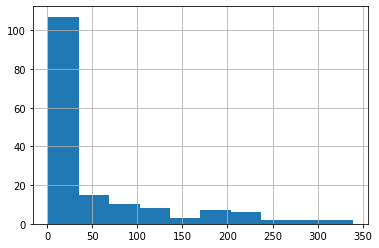

In [91]:
alcohol.hist();

In [0]:
# IQR

In [0]:
iqr = alcohol.quantile(.75) - alcohol.quantile(.25)

In [94]:
iqr

58.25

In [0]:
# min and max

In [96]:
alcohol.min()

1.0

In [97]:
alcohol.max()

339.0

In [0]:
# standard deviation

In [99]:
alcohol.std()

76.13491716376173

In [0]:
# variance

In [101]:
alcohol.var()

5796.52561153286

In [102]:
alcohol.std()**2 == alcohol.var()

True

#### The describe() Method

In [103]:
alcohol.describe()

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

In [104]:
alcohol.describe(percentiles=[.79, .19])

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

In [105]:
alcohol.describe(percentiles=[.79, .19], include=float, exclude=object)

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

In [106]:
alcohol.dtype

dtype('float64')

#### mode() And value_counts() 

In [0]:
# mode

In [108]:
alcohol.mode()

0    1.0
dtype: float64

In [109]:
alcohol == 1

country
Afghanistan    False
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam         True
Yemen          False
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [110]:
alcohol[alcohol==1].size

28

In [0]:
# value counts

In [112]:
alcohol.value_counts()

1.0      28
2.0      10
7.0       9
8.0       7
5.0       6
         ..
185.0     1
218.0     1
84.0      1
149.0     1
54.0      1
Name: wine_servings, Length: 71, dtype: int64

In [113]:
alcohol.value_counts().iloc[0]

28

In [114]:
alcohol.value_counts(normalize=True)

1.0      0.172840
2.0      0.061728
7.0      0.055556
8.0      0.043210
5.0      0.037037
           ...   
185.0    0.006173
218.0    0.006173
84.0     0.006173
149.0    0.006173
54.0     0.006173
Name: wine_servings, Length: 71, dtype: float64

In [115]:
28/alcohol.count()

0.1728395061728395

#### idxmax() And idxmin()

In [116]:
alcohol.max()

339.0

In [117]:
alcohol[alcohol == alcohol.max()]

country
Portugal    339.0
Name: wine_servings, dtype: float64

In [118]:
alcohol[alcohol == alcohol.max()].index

Index(['Portugal'], dtype='object', name='country')

In [119]:
type(alcohol[alcohol == alcohol.max()].index)

pandas.core.indexes.base.Index

In [120]:
alcohol[alcohol == alcohol.max()].index[0]

'Portugal'

In [121]:
alcohol.idxmax()

'Portugal'

In [122]:
alcohol.idxmin()

'Brunei'

In [123]:
alcohol.min()

1.0

In [124]:
alcohol.value_counts().head(1)

1.0    28
Name: wine_servings, dtype: int64

In [125]:
alcohol[alcohol == alcohol.min()]

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
Name: wine_servings, dtype: float64

In [126]:
alcohol[alcohol == alcohol.max()]

country
Portugal    339.0
Name: wine_servings, dtype: float64

In [127]:
alcohol[alcohol.idxmax()]

339.0

In [128]:
alcohol.max()

339.0

#### Sorting With sort_values()

In [129]:
alcohol.sort_values()

country
Thailand           1.0
Solomon Islands    1.0
Brunei             1.0
Haiti              1.0
Cambodia           1.0
                  ... 
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, Length: 193, dtype: float64

In [0]:
alcohol.sort_values(ascending=False, na_position='last', kind='quicksort', inplace=True) # mergesort, heapsort

In [131]:
alcohol.head()

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
Name: wine_servings, dtype: float64

In [0]:
# 1: reassignment

In [0]:
# 2: inplace param

#### nlargest() And nsmallest()

In [134]:
alcohol.min()

1.0

In [135]:
alcohol.max()

339.0

In [136]:
alcohol.sort_values(ascending=False)[:10]

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [137]:
alcohol.nlargest(n=10)

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [138]:
alcohol.nsmallest(29)

country
Niger                       1.0
Nicaragua                   1.0
Namibia                     1.0
Morocco                     1.0
Mali                        1.0
Malawi                      1.0
Oman                        1.0
Papua New Guinea            1.0
Vietnam                     1.0
Philippines                 1.0
Tanzania                    1.0
Kiribati                    1.0
Chad                        1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Comoros                     1.0
Central African Republic    1.0
Jordan                      1.0
Canada                      1.0
Guyana                      1.0
Cambodia                    1.0
Haiti                       1.0
Brunei                      1.0
Solomon Islands             1.0
Thailand                    1.0
Sierra Leone                2.0
Name: wine_servings, dtype: float64

#### Sorting With sort_index()

In [139]:
alcohol.head()

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
Name: wine_servings, dtype: float64

In [0]:
alcohol.sort_index(ascending=False, na_position='first', inplace=True)

In [141]:
alcohol.index.isnull().sum()

0

In [142]:
alcohol.head()

country
Zimbabwe     4.0
Zambia       4.0
Yemen        NaN
Vietnam      1.0
Venezuela    3.0
Name: wine_servings, dtype: float64

#### Skill Challenge

###### **1**.

Select all the countries from *alcohol* that have more than 50 wine servings, and save them (and the corresponding values) in a variable *fifty_plus*.

###### **2**.

From *fifty_plus*, choose the countries with the smallest 20 wine servings values. 

###### **3**.

What is the mean, median and standard deviation for the sample from Step 2?

#### Solution

In [0]:
# 1

In [0]:
fifty_plus = alcohol[alcohol > 50]

In [145]:
fifty_plus.head()

country
United Kingdom    195.0
USA                84.0
Sweden            186.0
St. Lucia          71.0
Spain             112.0
Name: wine_servings, dtype: float64

In [146]:
fifty_plus.count()

48

In [0]:
# 2

In [148]:
fifty_plus.nsmallest(n=20)

country
Seychelles             51.0
Bahamas                51.0
Albania                54.0
Poland                 56.0
Lithuania              56.0
Gabon                  59.0
Estonia                59.0
Latvia                 62.0
St. Lucia              71.0
Russian Federation     73.0
Paraguay               74.0
Cook Islands           74.0
Iceland                78.0
South Africa           81.0
USA                    84.0
Macedonia              86.0
Bulgaria               94.0
Finland                97.0
Spain                 112.0
Cyprus                113.0
Name: wine_servings, dtype: float64

In [0]:
# 3

In [150]:
fifty_plus.nsmallest(n=20).describe()

count     20.000000
mean      74.250000
std       19.072921
min       51.000000
25%       58.250000
50%       73.500000
75%       84.500000
max      113.000000
Name: wine_servings, dtype: float64

In [151]:
fifty_plus.nsmallest(n=20).median()

73.5

In [152]:
fifty_plus.nsmallest(n=20).mean()

74.25

In [153]:
fifty_plus.nsmallest(n=20).std()

19.07292100831631

#### Series Arithmetics And fill_value()

In [154]:
alcohol + 2

country
Zimbabwe         6.0
Zambia           6.0
Yemen            NaN
Vietnam          3.0
Venezuela        5.0
               ...  
Angola          47.0
Andorra        314.0
Algeria         16.0
Albania         56.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [155]:
(alcohol -10) * 2

country
Zimbabwe       -12.0
Zambia         -12.0
Yemen            NaN
Vietnam        -18.0
Venezuela      -14.0
               ...  
Angola          70.0
Andorra        604.0
Algeria          8.0
Albania         88.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [156]:
alcohol.head()

country
Zimbabwe     4.0
Zambia       4.0
Yemen        NaN
Vietnam      1.0
Venezuela    3.0
Name: wine_servings, dtype: float64

In [0]:
alcohol.sort_index(inplace=True)

In [158]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [0]:
more_drinks = pd.Series({'Albania': 6, 'Alberia': 19, 'Algeria': 10, 'Afghanistan': 100, 'Yemen': 101})

In [160]:
alcohol + more_drinks

Afghanistan     NaN
Albania        60.0
Alberia         NaN
Algeria        24.0
Andorra         NaN
               ... 
Venezuela       NaN
Vietnam         NaN
Yemen           NaN
Zambia          NaN
Zimbabwe        NaN
Length: 194, dtype: float64

In [161]:
alcohol.add(more_drinks, fill_value=0)

Afghanistan    100.0
Albania         60.0
Alberia         19.0
Algeria         24.0
Andorra        312.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          101.0
Zambia           4.0
Zimbabwe         4.0
Length: 194, dtype: float64

In [162]:
alcohol - more_drinks

Afghanistan     NaN
Albania        48.0
Alberia         NaN
Algeria         4.0
Andorra         NaN
               ... 
Venezuela       NaN
Vietnam         NaN
Yemen           NaN
Zambia          NaN
Zimbabwe        NaN
Length: 194, dtype: float64

In [163]:
alcohol.subtract(more_drinks, fill_value=0)

Afghanistan   -100.0
Albania         48.0
Alberia        -19.0
Algeria          4.0
Andorra        312.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen         -101.0
Zambia           4.0
Zimbabwe         4.0
Length: 194, dtype: float64

In [164]:
alcohol.divide(more_drinks, fill_value=1)

Afghanistan      0.010000
Albania          9.000000
Alberia          0.052632
Algeria          1.400000
Andorra        312.000000
                  ...    
Venezuela        3.000000
Vietnam          1.000000
Yemen            0.009901
Zambia           4.000000
Zimbabwe         4.000000
Length: 194, dtype: float64

In [165]:
alcohol.multiply(more_drinks, fill_value=1)

Afghanistan    100.0
Albania        324.0
Alberia         19.0
Algeria        140.0
Andorra        312.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          101.0
Zambia           4.0
Zimbabwe         4.0
Length: 194, dtype: float64

In [166]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [167]:
more_drinks.head()

Albania          6
Alberia         19
Algeria         10
Afghanistan    100
Yemen          101
dtype: int64

#### BONUS: Calculating Variance And Standard Deviation

In [168]:
alcohol.var()

5796.52561153286

In [169]:
(alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count()-1)

5796.5256115328575

In [170]:
alcohol.std()

76.13491716376173

In [171]:
((alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count()-1))**(1/2)

76.13491716376171

#### Cumulative Operations

In [0]:
# sum

In [173]:
alcohol.sum()

8221.0

In [174]:
alcohol.cumsum()

country
Afghanistan       NaN
Albania          54.0
Algeria          68.0
Andorra         380.0
Angola          425.0
                ...  
Venezuela      8212.0
Vietnam        8213.0
Yemen             NaN
Zambia         8217.0
Zimbabwe       8221.0
Name: wine_servings, Length: 193, dtype: float64

In [175]:
np.NaN + 123192380912

nan

In [176]:
pd.NA + 12312

<NA>

In [177]:
alcohol.prod()

3.4276115052182805e+183

In [178]:
alcohol.cumprod()

country
Afghanistan              NaN
Albania         5.400000e+01
Algeria         7.560000e+02
Andorra         2.358720e+05
Angola          1.061424e+07
                   ...      
Venezuela      2.142257e+182
Vietnam        2.142257e+182
Yemen                    NaN
Zambia         8.569029e+182
Zimbabwe       3.427612e+183
Name: wine_servings, Length: 193, dtype: float64

In [179]:
alcohol.cumprod()[-1] == alcohol.prod()

True

In [0]:
# cummin cummax

In [181]:
alcohol.min()

1.0

In [182]:
alcohol.cummin()

country
Afghanistan     NaN
Albania        54.0
Algeria        14.0
Andorra        14.0
Angola         14.0
               ... 
Venezuela       1.0
Vietnam         1.0
Yemen           NaN
Zambia          1.0
Zimbabwe        1.0
Name: wine_servings, Length: 193, dtype: float64

In [183]:
alcohol.max()

339.0

In [184]:
alcohol.cummax()

country
Afghanistan      NaN
Albania         54.0
Algeria         54.0
Andorra        312.0
Angola         312.0
               ...  
Venezuela      339.0
Vietnam        339.0
Yemen            NaN
Zambia         339.0
Zimbabwe       339.0
Name: wine_servings, Length: 193, dtype: float64

In [185]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [186]:
pd.Series({'a':'v1', 'b':'v2', 'c':'v3'})

a    v1
b    v2
c    v3
dtype: object

#### Pairwise Differences With diff()

In [187]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [188]:
alcohol.diff().head()

country
Afghanistan      NaN
Albania          NaN
Algeria        -40.0
Andorra        298.0
Angola        -267.0
Name: wine_servings, dtype: float64

In [189]:
alcohol.diff(periods=2).head()

country
Afghanistan      NaN
Albania          NaN
Algeria          NaN
Andorra        258.0
Angola          31.0
Name: wine_servings, dtype: float64

#### Series Iteration

In [0]:
mini_alc = alcohol[:10]

In [191]:
mini_alc

country
Afghanistan            NaN
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [192]:
for i in mini_alc:
  print(i)

nan
54.0
14.0
312.0
45.0
45.0
221.0
11.0
212.0
191.0


In [193]:
for i in mini_alc.index:
  print(i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua & Barbuda
Argentina
Armenia
Australia
Austria


In [194]:
for i in mini_alc.index:
  print(i, mini_alc[i])

Afghanistan nan
Albania 54.0
Algeria 14.0
Andorra 312.0
Angola 45.0
Antigua & Barbuda 45.0
Argentina 221.0
Armenia 11.0
Australia 212.0
Austria 191.0


In [195]:
for i in mini_alc.iteritems():
  print(i)

('Afghanistan', nan)
('Albania', 54.0)
('Algeria', 14.0)
('Andorra', 312.0)
('Angola', 45.0)
('Antigua & Barbuda', 45.0)
('Argentina', 221.0)
('Armenia', 11.0)
('Australia', 212.0)
('Austria', 191.0)


#### Filtering: filter(), where(), And mask()

In [196]:
alcohol.filter(regex='^V')

country
Vanuatu      11.0
Venezuela     3.0
Vietnam       1.0
Name: wine_servings, dtype: float64

In [197]:
alcohol.filter(like='stan')

country
Afghanistan      NaN
Kazakhstan      12.0
Kyrgyzstan       6.0
Pakistan         NaN
Tajikistan       NaN
Turkmenistan    32.0
Uzbekistan       8.0
Name: wine_servings, dtype: float64

In [198]:
alcohol[alcohol > 200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [199]:
alcohol.loc[alcohol > 200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [0]:
def gt200(x):
  return x > 200

In [201]:
alcohol[gt200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [0]:
# the where() method

In [203]:
alcohol.where(lambda x: x>200).dropna()

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [204]:
alcohol.where(lambda x: x<=200).dropna()

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 150, dtype: float64

In [0]:
# the mask() method

In [206]:
alcohol.mask(lambda x: x>200).dropna()

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 150, dtype: float64

#### Transforming With update(), apply() And map()

In [207]:
alcohol.head(10)

country
Afghanistan            NaN
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [0]:
# spot v global transforms

In [0]:
alcohol.loc['Algeria'] = 19

In [210]:
alcohol.head(10)

country
Afghanistan            NaN
Albania               54.0
Algeria               19.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [0]:
alcohol.loc['Albania'] = 190
alcohol.loc['Afghanistan'] = 20
alcohol.loc['Andorra'] = 29

In [212]:
alcohol.head(10)

country
Afghanistan           20.0
Albania              190.0
Algeria               19.0
Andorra               29.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [0]:
# the update() method

In [0]:
alcohol.update(pd.Series(data=[200, 20], index=['Albania', 'Algeria']))

In [215]:
alcohol.head(10)

country
Afghanistan           20.0
Albania              200.0
Algeria               20.0
Andorra               29.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [0]:
# the apply() method

In [217]:
alcohol.map(lambda x: x**2)

country
Afghanistan      400.0
Albania        40000.0
Algeria          400.0
Andorra          841.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [218]:
alcohol.map(np.square)

country
Afghanistan      400.0
Albania        40000.0
Algeria          400.0
Andorra          841.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [0]:
def multiply_by_self(x):
  return x*x

In [220]:
alcohol.apply(multiply_by_self)

country
Afghanistan      400.0
Albania        40000.0
Algeria          400.0
Andorra          841.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [0]:
def multiply_by_self_with_min(x, min_servings):
  if x < min_servings:
    return x**2
  
  return x

In [0]:
# alcohol.map(multiply_by_self_with_min, args=(200,))

In [223]:
alcohol.head()

country
Afghanistan     20.0
Albania        200.0
Algeria         20.0
Andorra         29.0
Angola          45.0
Name: wine_servings, dtype: float64

In [224]:
alcohol.apply(multiply_by_self_with_min, min_servings=200)

country
Afghanistan     400.0
Albania         200.0
Algeria         400.0
Andorra         841.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64

In [0]:
# the map() method

#### Skill Challenge

###### **1**.

Read the drinks.csv dataset again, this time bringing in the beer_servings sequence into a new <ins>series</ins> with country again acting as the index. Assign this series to the variable *beers*.

Link to data: https://andybek.com/pandas-drinks

###### **2**.

Calculate the mean, median, and standard deviation of beer servings in *beers*. Is the distribution right or left skewed?

###### **3**.

Slice the first 10 countriees from *beers*. Are these relatively large or small relative to the rest of the sample?

**BONUS**: To answer that, we could compare each value to the mean or median. An even
better approach would be to calculate standard scores, or z-scores as they 
are known.

###### **BONUS 4**.

Create a new series that uses series arithmetics to calculate the z-score 
for each serving by subtracting from each the mean and dividing the difference
by the standard deviation. Point the variable *z_scores* to this series.

Which country has the largest absolute z-score? Is this a positive or negative deviation? 

#### Solution I - Reading Data

In [0]:
data_url = 'https://andybek.com/pandas-drinks'

In [0]:
beers = pd.read_csv(data_url, usecols=['country', 'beer_servings'], index_col='country', squeeze=True)

In [228]:
beers.head()

country
Afghanistan      NaN
Albania         89.0
Algeria         25.0
Andorra        245.0
Angola         217.0
Name: beer_servings, dtype: float64

In [229]:
type(beers)

pandas.core.series.Series

#### Solution II - Mean, Median, And Standard Deviation

In [230]:
beers.mean()

102.87078651685393

In [231]:
beers.median()

60.0

In [232]:
beers.quantile(.5)

60.0

In [233]:
beers.std()

100.64571267934778

In [234]:
beers.var()**(1/2)

100.64571267934778

In [235]:
np.sqrt(beers.var())

100.64571267934778

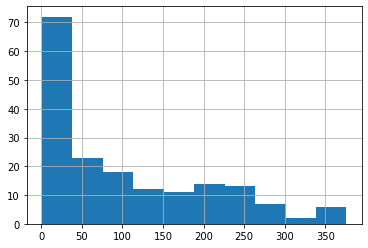

In [236]:
beers.hist();

In [237]:
beers.describe()

count    178.000000
mean     102.870787
std      100.645713
min        1.000000
25%       21.000000
50%       60.000000
75%      172.500000
max      376.000000
Name: beer_servings, dtype: float64

#### Solution III - Z-scores

In [238]:
beers[:10]

country
Afghanistan            NaN
Albania               89.0
Algeria               25.0
Andorra              245.0
Angola               217.0
Antigua & Barbuda     12.0
Argentina            193.0
Armenia               21.0
Australia            261.0
Austria              279.0
Name: beer_servings, dtype: float64

In [0]:
# beers.head(10)

In [240]:
beers.mean()

102.87078651685393

In [241]:
beers[:10] - beers.mean()

country
Afghanistan                 NaN
Albania              -13.870787
Algeria              -77.870787
Andorra              142.129213
Angola               114.129213
Antigua & Barbuda    -90.870787
Argentina             90.129213
Armenia              -81.870787
Australia            158.129213
Austria              176.129213
Name: beer_servings, dtype: float64

In [242]:
(beers[:10] - beers.mean()).apply(lambda x: 'low' if x<0 else 'high')

country
Afghanistan          high
Albania               low
Algeria               low
Andorra              high
Angola               high
Antigua & Barbuda     low
Argentina            high
Armenia               low
Australia            high
Austria              high
Name: beer_servings, dtype: object

In [243]:
(beers - beers.mean()).apply(lambda x: 'low' if x<0 else 'high').value_counts()

low     112
high     81
Name: beer_servings, dtype: int64

In [0]:
z_scores = (beers - beers.mean())/beers.std()

In [245]:
z_scores.head(10)

country
Afghanistan               NaN
Albania             -0.137818
Algeria             -0.773712
Andorra              1.412174
Angola               1.133970
Antigua & Barbuda   -0.902878
Argentina            0.895510
Armenia             -0.813455
Australia            1.571147
Austria              1.749992
Name: beer_servings, dtype: float64

In [246]:
z_scores.min()

-1.012172141315241

In [247]:
z_scores.max()

2.7137689844109123

In [248]:
z_scores.abs().max()

2.7137689844109123

In [249]:
beers.idxmax()

'Namibia'

In [250]:
beers['Namibia']

376.0

In [251]:
beers[beers.idxmax()]

376.0

In [252]:
z_scores.abs().max() * beers.std() + beers.mean()

376.0